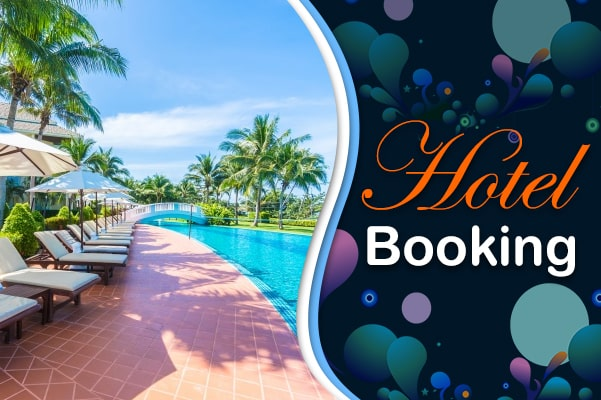

#**NAMA KELOMPOK**
* Rangga Saputra Hari Pratama (202110370311182)

* Muhammad Yusuf Rahmatullah (202110370311158)

* Ardian Ahmad Afifuddin (201910370311276)

# **DAFTAR ISI**


 * SELECTED DATASET:HOTEL BOOKINGS ✅
 * IMPORT LIBRARY ✅
 * DOWNLOAD DATA ✅
 * LOAD DATASET ✅
 * HANDLING MISSING VALUE ✅
 * VISUALISASI DEMOGRAFIS TAMU ✅
 * VISUALISASI POLA PEMESANAN HOTEL ✅
 * ANALISIS LANJUTAN UNTUK MENGIDENTIFIKASI KOLOM-KOLOM YANG MEMPENGARUHI TERJADINYA PEMBATALAN PEMESANAN (ExtraTreesClassifier) ✅
 * ANALISIS DAN VISUALISASI FAKTOR-FAKTOR YANG BERKONTRIBUSI TERHADAP PEMBATALAN PEMESANAN ✅





## **SELECTED DATASET:HOTEL BOOKINGS** ✅

Topik yang kita pilih yaitu: "Permintaan Pemesanan Hotel", dataset ini dapat digunakan untuk menganalisis pola pemesanan, tingkat pembatalan, dan faktor-faktor lain yang mempengaruhi operasional hotel dan banyaknya pemesanan yang dibatalkan.

### **Data Dictionary**
>* hotel - Jenis hotel (H1 = Resort Hotel, H2 = City Hotel).
* is_canceled - Menunjukkan apakah reservasi dibatalkan (1) atau tidak (0).
* lead_time - Jumlah hari antara tanggal pemesanan masuk dan tanggal kedatangan.
* arrival_date_year - Tahun kedatangan.
* arrival_date_month - Bulan kedatangan.
* arrival_date_week_number - Nomor minggu dalam tahun untuk tanggal kedatangan.
* arrival_date_day_of_month - Tanggal kedatangan dalam bulan.
* stays_in_weekend_nights - Jumlah malam akhir pekan (Sabtu atau Minggu) yang * * dipesan atau diinapi.
* stays_in_week_nights - Jumlah malam kerja (Senin hingga Jumat) yang dipesan atau diinapi.
* adults - Jumlah orang dewasa.
* children - Jumlah anak-anak.
* babies - Jumlah bayi.
* meal - Jenis paket makan yang dipesan: Undefined/SC (tanpa paket makan), BB (Bed & Breakfast), HB (Half board), FB (Full board).
* country - Negara asal, menggunakan format ISO 3155–3:2013.
* market_segment - Segmen pasar: "TA" (Travel Agents), "TO" (Tour Operators).
* distribution_channel - Saluran distribusi pemesanan: "TA" (Travel Agents), "TO" (Tour Operators).
* is_repeated_guest - Menunjukkan apakah tamu merupakan tamu yang sama (1) atau bukan (0).
* previous_cancellations - Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan.
* previous_bookings_not_canceled - Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan.
* reserved_room_type - Kode jenis kamar yang dipesan (dianonimkan).
* assigned_room_type - Kode jenis kamar yang diberikan, yang mungkin berbeda dengan kamar yang dipesan (dianonimkan).
* booking_changes - Jumlah perubahan yang dilakukan pada pemesanan sebelum check-in atau pembatalan.
* deposit_type - Jenis deposit: No Deposit (tanpa deposit), Non Refund (deposit penuh), Refundable (deposit sebagian).
* agent - ID agen perjalanan yang melakukan pemesanan (dianonimkan).
* company - ID perusahaan/lembaga yang bertanggung jawab atas pemesanan atau pembayaran (dianonimkan).
* days_in_waiting_list - Jumlah hari pemesanan berada di daftar tunggu sebelum dikonfirmasi.
* customer_type - Jenis pemesanan: Contract (terkait kontrak), Group (terkait grup), Transient (tidak terkait grup atau kontrak), Transient-party (terhubung dengan pemesanan transient lainnya).
* adr - Rata-rata tarif harian, dihitung dengan membagi total transaksi penginapan dengan total malam menginap.
* required_car_parking_spaces - Jumlah tempat parkir mobil yang diminta oleh pelanggan.
* total_of_special_requests - Jumlah permintaan khusus (misalnya, tempat tidur twin atau lantai atas).
* reservation_status - Status reservasi: Canceled (dibatalkan), Check-Out (pelanggan sudah check-out), No-Show (pelanggan tidak check-in).
* reservation_status_date - Tanggal saat status terakhir reservasi ditetapkan.

## **IMPORT LIBRARY ✅**


In [38]:
# Library for import data
import requests
import zipfile
import os

# Library for load dataset
import pandas as pd
import numpy as np

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# Library for Regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Membersihkan warning
import warnings
warnings.filterwarnings('ignore')

## **DOWNLOAD DATA ✅**

In [39]:
# URL Dropbox (ubah '?dl=1' agar dapat diunduh langsung)
url = "https://www.dropbox.com/sh/qwdaldzkp8yrqwj/AADTj_WQcuKA0bsEeCKU__98a?dl=1"
download_url = url.replace("?dl=1", "?dl=1")  # Untuk memastikan direct download

# Nama file unduhan
output_file = "hotel_bookings_dataset.zip"

# Fungsi untuk mengunduh file
def download_file(url, output_file):
    print("Mengunduh dataset...")
    response = requests.get(url, stream=True)
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Unduhan selesai!")

# Fungsi untuk mengekstrak file zip
def extract_zip(file_path, extract_to="."):
    print("Mengekstrak file...")
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Ekstraksi selesai! File diekstrak ke: {extract_to}")

# Jalankan proses unduh dan ekstrak
try:
    download_file(download_url, output_file)
    extract_zip(output_file, extract_to="dataset_hotel_bookings")
    print("Dataset siap digunakan!")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

# Hapus file zip setelah ekstraksi (opsional)
if os.path.exists(output_file):
    os.remove(output_file)
    print(f"File zip {output_file} telah dihapus.")

Mengunduh dataset...
Unduhan selesai!
Mengekstrak file...
Ekstraksi selesai! File diekstrak ke: dataset_hotel_bookings
Dataset siap digunakan!
File zip hotel_bookings_dataset.zip telah dihapus.


## **LOAD DATASET ✅**

In [40]:
# Load dataset
data_path = "dataset_hotel_bookings/hotels.csv"  # Ubah sesuai dengan lokasi file Anda
df = pd.read_csv(data_path)

# Tampilkan beberapa baris pertama
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [42]:
df.shape

(119390, 32)

In [43]:
# Cek jumlah nilai yang hilang di setiap kolom
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## **HANDLING MISSING VALUE ✅**

> Kolom *company* mencatat ID perusahaan atau lembaga yang bertanggung jawab atas pemesanan atau pembayaran. Jika nilainya kosong (*null*), hal ini kemungkinan besar menunjukkan bahwa pemesanan dilakukan secara individu atau personal, tanpa keterlibatan perusahaan atau lembaga.



In [44]:
df['company'].fillna(1000, inplace=True)

> Nilai *null* pada kolom *agent* kemungkinan besar menunjukkan bahwa pemesanan dilakukan langsung oleh tamu tanpa menggunakan jasa agen perjalanan, seperti melalui situs web hotel atau pemesanan via telepon.

In [45]:
df['agent'].fillna(1000, inplace=True)

### **Drop Missing Values ​​Yang Tidak Memberikan Informasi**

In [46]:
# Drop rows where 'country' is null
df.dropna(subset=['country'], inplace=True)

# Drop rows where 'children' is null
df.dropna(subset=['children'], inplace=True)

### **Hasil Setelah Handling Missing Value**

In [47]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [48]:
df.shape

(118898, 32)

In [49]:
# Menampilkan tahun pertama dan terakhir pada kolom 'arrival_date_year'
earliest_year = df['arrival_date_year'].min()
latest_year = df['arrival_date_year'].max()

print(f"Tahun paling lama: {earliest_year}")
print(f"Tahun paling baru: {latest_year}")

Tahun paling lama: 2015
Tahun paling baru: 2017


## **VISUALISASI DEMOGRAFIS TAMU✅**


### **Pesanan yang dibatalkan vs tidak dibatalkan**

In [50]:
# Get the value counts and reset the index
cancellation_counts = df['is_canceled'].value_counts().reset_index()
cancellation_counts.columns = ['is_canceled', 'count']  # Rename columns for clarity

# Plot the bar chart with enhancements
fig = px.bar(
    cancellation_counts,
    x='is_canceled',
    y='count',
    text='count',  # Add text labels to the bars
    title='Cancellation Status Dari Tahun 2015 - 2017',
    labels={'is_canceled': 'tidak dibatalkan (0) vs  dibatalkan (1)', 'count': 'Total'},
    color='is_canceled',  # Add color differentiation
    color_discrete_sequence=['#1f77b4', '#ff7f0e']  # Custom color sequence
)

# Update layout for better readability
fig.update_traces(textposition='outside')  # Position text outside the bars
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['tidak dibatalkan (0)', 'dibatalkan (1)']),
    yaxis_title='Number of Bookings',
    xaxis_title='Cancellation Status',
    font=dict(size=14),  # Increase font size for readability
    template='plotly_white'  # Use a clean theme
)

fig.show()


### **Asal Negara Tamu**

In [51]:
# Filter data untuk pesanan yang tidak dibatalkan
df_non_canceled = df[df['is_canceled'] == 0]

# Mendapatkan nilai count untuk kolom 'country' dari pesanan yang tidak dibatalkan
country_counts = df_non_canceled['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Membuat bar chart menggunakan Plotly
fig = px.bar(country_counts.head(10),
             x='country', y='count',
             title='Top 10 Negara Asal Tamu Dari Tahun 2015 - 2017 (Pesanan Tidak Dibatalkan)',
             labels={'country': 'Negara', 'count': 'Jumlah Tamu'},
             color='count', color_continuous_scale='Inferno')

fig.update_layout(xaxis_tickangle=-45)  # Memutar label x-axis
fig.show()

In [52]:
# Membuat choropleth untuk visualisasi jumlah tamu berdasarkan negara asal
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='ISO-3',
    color='count',
    hover_name='country',
    title='Jumlah Tamu Berdasarkan Negara Asal (Pesanan Tidak Dibatalkan)',
    color_continuous_scale='Plasma'  # Menggunakan skala warna berbeda untuk peta
)

# Update layout untuk choropleth
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    font=dict(size=14),  # Memperbesar font untuk judul dan label
    template='plotly_white'  # Menggunakan tema bersih
)

fig.show()


### **Kategori Pengunjung**


In [53]:
# Filter data untuk pesanan yang tidak dibatalkan
df_non_canceled = df[df['is_canceled'] == 0]

# Menggabungkan kolom 'adults', 'children', dan 'babies' menjadi satu kolom pada data yang tidak dibatalkan
df_melted = df_non_canceled[['adults', 'children', 'babies']].melt(var_name='category', value_name='count')

# Menghitung jumlah total untuk setiap kategori (adults, children, babies)
category_counts = df_melted.groupby('category')['count'].sum().reset_index()

# Membuat bar chart untuk visualisasi jumlah adults, children, dan babies
fig = px.bar(category_counts,
             x='category', y='count',
             title='Jumlah Tamu Berdasarkan Kategori (Adults, Children, Babies) Dari Tahun 2015 - 2017 (Pesanan Tidak Dibatalkan)',
             labels={'category': 'Kategori', 'count': 'Jumlah'},
             color='category', color_discrete_map={'adults': 'pink', 'children': 'orange', 'babies': 'green'})

fig.show()


### **Datang sebagai Tamu dari company atau personal**

In [54]:
# Mengelompokkan data ke dalam dua kategori
df['company_category'] = df['company'].apply(lambda x: 'Personal' if x == 1000 else 'Company')

# Menghitung jumlah kategori
company_counts = df['company_category'].value_counts().reset_index()
company_counts.columns = ['category', 'count']

# Membuat pie chart dengan Plotly
fig = px.pie(company_counts,
             values='count',
             names='category',
             title='Proporsi Tamu Datang Sebagai Personal atau Company Dari Tahun 2015 - 2017',
             color_discrete_sequence=['pink', 'green'])

# Menampilkan plot
fig.show()

In [55]:
import plotly.express as px

# Menghitung jumlah pembatalan berdasarkan kategori tamu (Personal atau Company)
cancellation_counts = df.groupby(['company_category', 'is_canceled']).size().reset_index(name='count')
cancellation_counts['is_canceled'] = cancellation_counts['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

# Membuat bar chart dengan Plotly
fig = px.bar(cancellation_counts,
             x='company_category',
             y='count',
             color='is_canceled',
             barmode='group',
             title='Pembatalan Berdasarkan Kategori Tamu (Personal atau Company)',
             labels={'company_category': 'Kategori Tamu', 'count': 'Jumlah', 'is_canceled': 'Status Pembatalan'},
             color_discrete_sequence=['pink', 'green'])

# Menampilkan plot
fig.show()

### **Datang sebagai tamu dari agent atau langsung**

In [56]:
# Mengelompokkan data ke dalam dua kategori
df['agent_category'] = df['agent'].apply(lambda x: 'Langsung' if x == 1000 else 'agent')

# Menghitung jumlah kategori
agent_counts = df['agent_category'].value_counts().reset_index()
agent_counts.columns = ['category', 'count']

# Membuat pie chart dengan Plotly
fig = px.pie(agent_counts,
             values='count',
             names='category',
             title='Proporsi Tamu Datang Sebagai Agent atau langsung Dari Tahun 2015 - 2017',
             color_discrete_sequence=['pink', 'green'])

# Menampilkan plot
fig.show()





In [57]:
import plotly.express as px

# Menghitung jumlah pembatalan berdasarkan kategori tamu (Langsung atau agent)
cancellation_counts = df.groupby(['agent_category', 'is_canceled']).size().reset_index(name='count')
cancellation_counts['is_canceled'] = cancellation_counts['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

# Membuat bar chart dengan Plotly
fig = px.bar(cancellation_counts,
             x='agent_category',
             y='count',
             color='is_canceled',
             barmode='group',
             title='Pembatalan Berdasarkan Kategori Tamu (Langsung atau agent)',
             labels={'agent_category': 'Kategori Tamu', 'count': 'Jumlah', 'is_canceled': 'Status Pembatalan'},
             color_discrete_sequence=['pink', 'green'])

# Menampilkan plot
fig.show()

### **customer type**



* **Transient**: Merujuk pada tamu yang memesan hotel secara individu tanpa keterkaitan dengan grup atau kontrak tertentu.
* **Transient-party**: Serupa dengan Transient, namun pemesanan ini terkait dengan minimal satu pemesanan Transient lainnya. Artinya, meskipun tamu tidak tergabung dalam grup atau kontrak, mereka melakukan pemesanan bersama dengan tamu lain secara terpisah.
* **Contract**: Pemesanan yang dilakukan berdasarkan kontrak yang telah disepakati antara hotel dan pelanggan, seperti perusahaan, organisasi, atau individu.
* **Group**: Pemesanan yang dilakukan untuk kelompok besar, biasanya untuk rombongan atau acara yang melibatkan sejumlah tamu.

In [58]:
# Filter data untuk pesanan yang tidak dibatalkan
df_non_canceled = df[df['is_canceled'] == 0]

# Menghitung jumlah masing-masing customer_type pada data yang tidak dibatalkan
customer_type_counts = df_non_canceled['customer_type'].value_counts().reset_index()
customer_type_counts.columns = ['customer_type', 'count']

# Membuat bar chart menggunakan Plotly
fig = px.bar(customer_type_counts,
             x='customer_type', y='count',
             title='Jumlah Pelanggan Berdasarkan Tipe Pelanggan (Pesanan Tidak Dibatalkan)',
             labels={'customer_type': 'Tipe Pelanggan', 'count': 'Jumlah'},
             color='customer_type', color_discrete_map={'Transient': 'pink', 'Contract': 'maroon', 'Group': 'chocolate', 'Transient-Party': 'green'})

fig.show()


## **VISUALISASI POLA PEMESANAN HOTEL✅**

### **Musim dengan tingkat pemesanan tertinggi dalam Bulan**

In [59]:
# Pastikan 'reservation_status_date' adalah tipe data datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Filter data untuk pesanan yang tidak dibatalkan
df_non_canceled = df[df['is_canceled'] == 0]

# Tambahkan kolom bulan
df_non_canceled['month'] = df_non_canceled['reservation_status_date'].dt.month

# Grup data berdasarkan bulan
monthly_bookings = df_non_canceled.groupby('month')['hotel'].count().reset_index()

# Buat plot dengan Plotly
fig = px.bar(
    monthly_bookings,
    x='month',
    y='hotel',
    title="Jumlah Pemesanan Per Bulan (Pesanan Tidak Dibatalkan)",
    labels={'month': 'Bulan', 'hotel': 'Jumlah Pemesanan'},
    color='hotel',
    color_continuous_scale=['#FF69B4', '#32CD32', '#1E90FF', '#FFD700', '#FFA07A', '#8A2BE2', '#5F9EA0']  # Custom color scale
)

# Update layout untuk bulan dengan format yang benar
fig.update_layout(
    xaxis_title="Bulan",
    yaxis_title="Jumlah Pemesanan",
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ),
    coloraxis_colorbar_title="Jumlah Pemesanan"
)

fig.show()


###  **Durasi rata-rata Pelanggan Mengina**p

In [60]:
import pandas as pd
import plotly.express as px

# Filter data untuk pesanan yang tidak dibatalkan
df_non_canceled = df[df['is_canceled'] == 0]

# Hitung durasi menginap total (malam akhir pekan + malam kerja)
df_non_canceled['total_stay'] = df_non_canceled['stays_in_weekend_nights'] + df_non_canceled['stays_in_week_nights']

# Hitung rata-rata durasi menginap per pelanggan
average_stay = df_non_canceled['total_stay'].mean()

# Hitung jumlah data
total_count = len(df_non_canceled)

# Buat histogram untuk durasi menginap
fig = px.histogram(df_non_canceled,
                   x='total_stay',
                   title=f'Rata-rata Durasi Menginap: {average_stay:.2f} Malam Berdasarkan Keseluruhan Pelanggan (Tidak Dibatalkan)',
                   labels={'total_stay': 'Durasi Menginap (Malam)'},
                   nbins=30,
                   color_discrete_sequence=['pink'])

fig.add_vline(x=average_stay, line_width=2, line_dash="dash", line_color="maroon")

fig.add_annotation(
    x=0.5,
    y=0.95,
    text=f"Total Data: {total_count} pelanggan\nRata-rata Durasi Menginap: {average_stay:.2f} malam",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="center",
    xref="paper", yref="paper"
)

fig.show()

# Hitung rata-rata durasi menginap dan jumlah pelanggan berdasarkan customer_type
avg_stay_by_customer_type = df_non_canceled.groupby('customer_type').agg(
    total_stay=('total_stay', 'mean'),
    customer_count=('customer_type', 'count')
).reset_index()

# Buat bar chart untuk rata-rata durasi menginap berdasarkan customer_type
fig = px.bar(
    avg_stay_by_customer_type,
    x='customer_type',
    y='total_stay',
    title='Rata-rata Durasi Menginap Berdasarkan Tipe Pelanggan (Tidak Dibatalkan)',
    labels={'customer_type': 'Tipe Pelanggan', 'total_stay': 'Rata-rata Durasi Menginap (Malam)'},
    color='customer_type',
    color_discrete_sequence=['#FF69B4', '#32CD32', '#1E90FF', '#FFD700']
)

for index, row in avg_stay_by_customer_type.iterrows():
    fig.add_annotation(
        x=row['customer_type'],
        y=row['total_stay'] * 0.5,
        text=f"Jumlah Pelanggan: {row['customer_count']}",
        showarrow=False,
        font=dict(size=12, color="white" if row['customer_type'] != 'Contract' else "black"),
        align="center"
    )

max_stay_row = avg_stay_by_customer_type.loc[avg_stay_by_customer_type['total_stay'].idxmax()]
fig.add_annotation(
    x=max_stay_row['customer_type'],
    y=max_stay_row['total_stay'] + 0.5,
    text=f"Max: {max_stay_row['total_stay']:.2f} malam",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color="black")
)

fig.show()

# Hitung rata-rata durasi menginap dan jumlah pelanggan berdasarkan customer_type dan hotel
avg_stay_by_customer_type_and_hotel = df_non_canceled.groupby(['customer_type', 'hotel']).agg(
    total_stay=('total_stay', 'mean'),
    customer_count=('customer_type', 'count')
).reset_index()

# Buat bar chart untuk rata-rata durasi menginap berdasarkan customer_type dan hotel
fig = px.bar(
    avg_stay_by_customer_type_and_hotel,
    x='customer_type',
    y='total_stay',
    color='hotel',
    title='Rata-rata Durasi Menginap Berdasarkan Tipe Pelanggan dan Hotel (Tidak Dibatalkan)',
    labels={'customer_type': 'Tipe Pelanggan', 'total_stay': 'Rata-rata Durasi Menginap (Malam)', 'hotel': 'Jenis Hotel'},
    color_discrete_sequence=['#FF69B4', '#32CD32']
)

for index, row in avg_stay_by_customer_type_and_hotel.iterrows():
    y_position = row['total_stay'] * (0.4 if row['hotel'] == 'City Hotel' else 0.8)
    text_color = 'black' if row['hotel'] == 'City Hotel' else 'white'
    hotel_label = f"{row['customer_count']} Pelanggan"
    fig.add_annotation(
        x=row['customer_type'],
        y=y_position,
        text=hotel_label,
        showarrow=False,
        font=dict(size=12, color=text_color),
        align="center"
    )

fig.show()

### **Proporsi pemesanan berdasarkan tipe hotel Resort vs City**

In [61]:
import plotly.express as px

# Menghitung jumlah kategori berdasarkan hotel
hotel_counts = df['hotel'].value_counts().reset_index()
hotel_counts.columns = ['category', 'count']

# Membuat pie chart untuk proporsi tamu berdasarkan tipe hotel
fig = px.pie(
    hotel_counts,
    values='count',
    names='category',
    title='Proporsi Tamu Berdasarkan Tipe Hotel Dari Tahun 2015 - 2017 (Keseluruhan)',
    color_discrete_sequence=['pink', 'green']
)
fig.update_traces(textinfo='percent+label+value', textposition='inside')
# Menampilkan pie chart
fig.show()


In [62]:
# Memfilter data untuk hanya mencakup pemesanan yang tidak dibatalkan (is_canceled = 0)
df_non_canceled = df[df['is_canceled'] == 0]

# Menghitung jumlah pemesanan berdasarkan tipe hotel untuk data yang tidak dibatalkan
hotel_counts_non_canceled = df_non_canceled['hotel'].value_counts().reset_index()
hotel_counts_non_canceled.columns = ['hotel', 'count']

# Membuat pie chart untuk proporsi pemesanan berdasarkan tipe hotel (hanya yang tidak dibatalkan)
fig = px.pie(
    hotel_counts_non_canceled,
    values='count',
    names='hotel',
    title='Proporsi Pemesanan Berdasarkan Tipe Hotel (Tidak Dibatalkan)',
    color_discrete_sequence=['maroon', 'chocolate']
)

# Menampilkan informasi jumlah pelanggan dan persen pada pie chart
fig.update_traces(textinfo='percent+label+value', textposition='inside')

# Menampilkan chart
fig.show()

In [63]:
# Menghitung jumlah pembatalan berdasarkan kategori hotel
cancellation_counts_hotel = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')
cancellation_counts_hotel['is_canceled'] = cancellation_counts_hotel['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

# Membuat bar chart dengan Plotly untuk pembatalan berdasarkan tipe hotel
fig = px.bar(
    cancellation_counts_hotel,
    x='hotel',
    y='count',
    color='is_canceled',
    barmode='group',
    title='Pembatalan Berdasarkan Tipe Hotel',
    labels={'hotel': 'Tipe Hotel', 'count': 'Jumlah', 'is_canceled': 'Status Pembatalan'},
    color_discrete_sequence=['pink', 'green']
)

# Menampilkan bar chart
fig.show()

## **ANALISIS LANJUTAN UNTUK MENGIDENTIFIKASI KOLOM-KOLOM YANG MEMPENGARUHI TERJADINYA PEMBATALAN PEMESANAN✅**

### **Menggunakan ExtraTreesClassifier**

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Pilih fitur dan label
features = ['lead_time', 'adults', 'children', 'babies', 'adr',
            'previous_cancellations', 'market_segment', 'deposit_type',
            'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']
X = df[features]
y = df['is_canceled']  # Label (status pembatalan)

# Mengonversi fitur kategori menjadi variabel dummy untuk model
X = pd.get_dummies(X, drop_first=True)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Extra Trees
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



ExtraTreesClassifier(random_state=42)

In [65]:
# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     14851
           1       0.79      0.73      0.76      8929

    accuracy                           0.83     23780
   macro avg       0.82      0.81      0.81     23780
weighted avg       0.82      0.83      0.82     23780



### **fitur yang mempengaruhi**

In [66]:
# Mendapatkan feature importance
importances = model.feature_importances_

# Menampilkan koefisien penting berdasarkan fitur
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                          Feature  Importance
4                             adr    0.296867
0                       lead_time    0.267423
14        deposit_type_Non Refund    0.166247
7       total_of_special_requests    0.060675
5          previous_cancellations    0.041176
11          market_segment_Groups    0.030695
6     required_car_parking_spaces    0.025338
17        customer_type_Transient    0.021342
13       market_segment_Online TA    0.019574
18  customer_type_Transient-Party    0.019374
1                          adults    0.015684
10          market_segment_Direct    0.014412
12   market_segment_Offline TA/TO    0.009211
2                        children    0.005829
9        market_segment_Corporate    0.003316
3                          babies    0.001034
15        deposit_type_Refundable    0.000738
16            customer_type_Group    0.000594
8    market_segment_Complementary    0.000471


### **Visualisasi Fitur yang mempengaruhi**

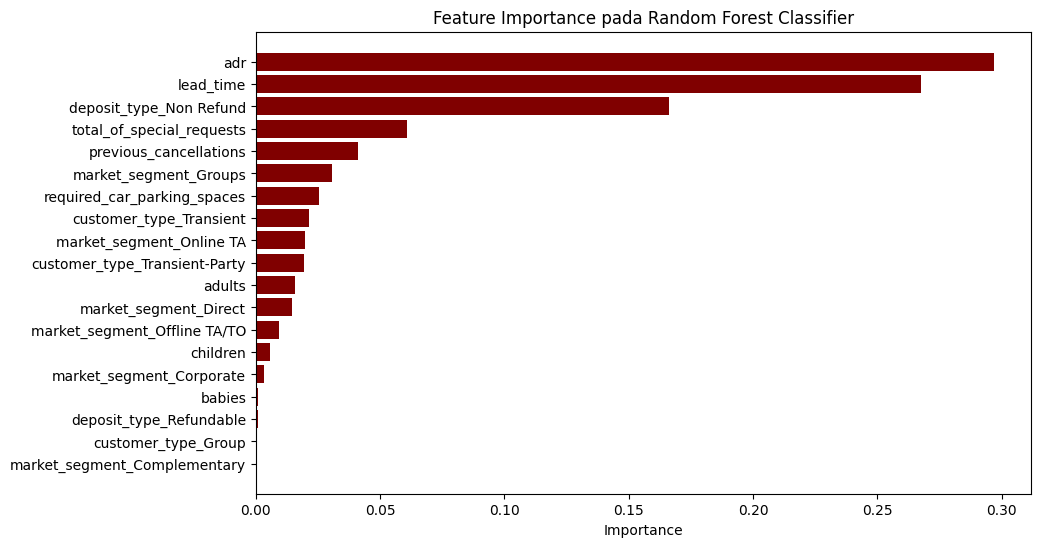

In [67]:
# Visualisasi menggunakan bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.title('Feature Importance pada Random Forest Classifier')
plt.gca().invert_yaxis()  # Membalik urutan fitur yang paling penting di atas
plt.show()

## **ANALISIS DAN VISUALISASI FAKTOR-FAKTOR YANG BERKONTRIBUSI TERHADAP PEMBATALAN PEMESANAN✅**

### **Deposit yang dibayar oleh tamu untuk menjamin pemesanan mereka di hotel**



- **No Deposit**: Tamu tidak membayar deposit saat melakukan pemesanan. Pembayaran dilakukan sepenuhnya pada saat check-in.  
- **Non Refund**: Tamu membayar seluruh biaya menginap di muka sebagai deposit, yang tidak akan dikembalikan jika pemesanan dibatalkan.  
- **Refundable**: Tamu membayar sebagian dari total biaya menginap sebagai deposit, yang dapat dikembalikan jika pemesanan dibatalkan.  

In [68]:
import plotly.express as px

# Get the value counts and reset the index
cancellation_counts = df['deposit_type'].value_counts().reset_index()
cancellation_counts.columns = ['deposit_type', 'count']  # Rename columns for clarity

# Plot the bar chart dengan warna lembut
fig = px.bar(cancellation_counts,
             x='deposit_type', y='count',
             title='Distribusi Deposit Type (2015 - 2017) Keseluruhan',
             labels={'deposit_type': 'Deposit Tipe',
                     'count': 'Jumlah Orang'},
             color='deposit_type',  # Memberikan warna berbeda untuk setiap kategori
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Palet warna lembut

# Menampilkan grafik
fig.show()


# Menghitung jumlah pembatalan berdasarkan Deposit Type
cancellation_counts = df.groupby(['deposit_type', 'is_canceled']).size().reset_index(name='count')
cancellation_counts['is_canceled'] = cancellation_counts['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

# Membuat bar chart dengan Plotly
fig = px.bar(cancellation_counts,
             x='deposit_type',
             y='count',
             color='is_canceled',
             barmode='group',
             title='Pembatalan Berdasarkan Kategori Tipe Deposit',
             labels={'deposit_type': 'Deposit Type', 'count': 'Jumlah', 'is_canceled': 'Status Pembatalan'},
             color_discrete_sequence=['pink', 'green'])

# Menampilkan plot
fig.show()

### **total_of_special_requests**



Bagian ini menggambarkan jumlah permintaan khusus yang diajukan oleh tamu selama proses pemesanan hotel. Misalnya, jika nilai untuk total_of_special_requests adalah 3, berarti tamu tersebut meminta 3 hal khusus terkait dengan penginapan mereka.
> * 0: Tidak ada permintaan khusus yang diajukan oleh tamu
> * 1, 2, 3, 4, 5: Masing-masing angka ini menunjukkan jumlah permintaan khusus yang diajukan.

In [69]:
import pandas as pd
import plotly.express as px

# Contoh data (gantikan dengan dataset Anda)
data = {
    'total_of_special_requests': [0, 1, 2, 0, 1, 3, 0, 2, 1, 0, 0, 1, 2, 3, 0]
}
df = pd.DataFrame(data)

# Hitung jumlah setiap nilai di kolom 'total_of_special_requests'
special_counts = df['total_of_special_requests'].value_counts().reset_index()
special_counts.columns = ['total_of_special_requests', 'count']

# Ubah kolom menjadi kategori (string)
special_counts['total_of_special_requests'] = special_counts['total_of_special_requests'].astype(str)

# Plot bar chart dengan warna lembut
fig = px.bar(special_counts,
             x='total_of_special_requests', y='count',
             title='Distribusi Total of Special Requests (2015 - 2017) Keseluruhan',
             labels={'total_of_special_requests': 'Total Request',
                     'count': 'Jumlah Orang'},
             color='total_of_special_requests',  # Menggunakan warna diskrit
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Palet warna lembut

# Menampilkan grafik
fig.show()

In [70]:
import pandas as pd
import plotly.express as px

# Contoh data (sesuaikan dengan dataset Anda)
data = {
    'total_of_special_requests': [0, 1, 2, 0, 1, 3, 0, 2, 1, 0],
    'is_canceled': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Menghitung jumlah pembatalan berdasarkan Total Request
spes_counts = df.groupby(['total_of_special_requests', 'is_canceled']).size().reset_index(name='count')
spes_counts['is_canceled'] = spes_counts['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

# Membuat bar chart dengan Plotly
fig = px.bar(spes_counts,
             x='total_of_special_requests',
             y='count',
             color='is_canceled',
             barmode='group',
             title='Pembatalan Berdasarkan Kategori total_of_special_requests',
             labels={'total_of_special_requests': 'Total Request', 'count': 'Jumlah', 'is_canceled': 'Status Pembatalan'},
             color_discrete_sequence=['pink', 'green'])

# Menampilkan plot
fig.show()